In [129]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
from time import time
from IPython.display import display 
!pip install vpython
# Pretty display for notebooks
%matplotlib inline
import seaborn as sns

In [130]:
# Suppress matplotlib user warnings
# Necessary for newer version of matplotlib
import warnings
warnings.filterwarnings("ignore", category = UserWarning, module = "matplotlib")
#
# Display inline matplotlib plots with IPython
from IPython import get_ipython
get_ipython().run_line_magic('matplotlib', 'inline')

In [131]:
df = pd.read_csv('SalaryData_Test.csv')

In [132]:
df.shape

(15060, 14)

In [133]:
# preview the dataset

df.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K


In [134]:
df.columns

Index(['age', 'workclass', 'education', 'educationno', 'maritalstatus',
       'occupation', 'relationship', 'race', 'sex', 'capitalgain',
       'capitalloss', 'hoursperweek', 'native', 'Salary'],
      dtype='object')

In [135]:
# view summary of dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15060 entries, 0 to 15059
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            15060 non-null  int64 
 1   workclass      15060 non-null  object
 2   education      15060 non-null  object
 3   educationno    15060 non-null  int64 
 4   maritalstatus  15060 non-null  object
 5   occupation     15060 non-null  object
 6   relationship   15060 non-null  object
 7   race           15060 non-null  object
 8   sex            15060 non-null  object
 9   capitalgain    15060 non-null  int64 
 10  capitalloss    15060 non-null  int64 
 11  hoursperweek   15060 non-null  int64 
 12  native         15060 non-null  object
 13  Salary         15060 non-null  object
dtypes: int64(5), object(9)
memory usage: 1.6+ MB


In [136]:
# find categorical variables

categorical = [var for var in df.columns if df[var].dtype=='O']

print('There are {} categorical variables\n'.format(len(categorical)))

print('The categorical variables are :\n\n', categorical)

There are 9 categorical variables

The categorical variables are :

 ['workclass', 'education', 'maritalstatus', 'occupation', 'relationship', 'race', 'sex', 'native', 'Salary']


In [137]:
# view the categorical variables

df[categorical].head()

,workclass,education,maritalstatus,occupation,relationship,race,sex,native,Salary
0,Private,11th,Never-married,Machine-op-inspct,Own-child,Black,Male,United-States,<=50K
1,Private,HS-grad,Married-civ-spouse,Farming-fishing,Husband,White,Male,United-States,<=50K
2,Local-gov,Assoc-acdm,Married-civ-spouse,Protective-serv,Husband,White,Male,United-States,>50K
3,Private,Some-college,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,United-States,>50K
4,Private,10th,Never-married,Other-service,Not-in-family,White,Male,United-States,<=50K


There are 5 categorical variables.
The categorical variables are given by workclass, education, maritalstatus, occupation, relationship, race, sex, native and salary.
salary is the target variable.

In [138]:
# check missing values in categorical variables

df[categorical].isnull().sum()

workclass        0
education        0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
native           0
Salary           0
dtype: int64

In [139]:
# view frequency counts of values in categorical variables

for var in categorical: 
    
    print(df[var].value_counts())

 Private             11021
 Self-emp-not-inc     1297
 Local-gov            1033
 State-gov             667
 Self-emp-inc          572
 Federal-gov           463
 Without-pay             7
Name: workclass, dtype: int64
 HS-grad         4943
 Some-college    3221
 Bachelors       2526
 Masters          887
 Assoc-voc        652
 11th             571
 Assoc-acdm       499
 10th             403
 7th-8th          266
 Prof-school      243
 9th              221
 12th             200
 Doctorate        169
 5th-6th          161
 1st-4th           71
 Preschool         27
Name: education, dtype: int64
 Married-civ-spouse       6990
 Never-married            4872
 Divorced                 2083
 Separated                 472
 Widowed                   450
 Married-spouse-absent     182
 Married-AF-spouse          11
Name: maritalstatus, dtype: int64
 Exec-managerial      1992
 Craft-repair         1990
 Prof-specialty       1970
 Sales                1824
 Adm-clerical         1819
 Other-servic

In [140]:
# view frequency distribution of categorical variables

for var in categorical: 
    
    print(df[var].value_counts()/np.float(len(df)))

 Private             0.731806
 Self-emp-not-inc    0.086122
 Local-gov           0.068592
 State-gov           0.044290
 Self-emp-inc        0.037981
 Federal-gov         0.030744
 Without-pay         0.000465
Name: workclass, dtype: float64
 HS-grad         0.328220
 Some-college    0.213878
 Bachelors       0.167729
 Masters         0.058898
 Assoc-voc       0.043293
 11th            0.037915
 Assoc-acdm      0.033134
 10th            0.026760
 7th-8th         0.017663
 Prof-school     0.016135
 9th             0.014675
 12th            0.013280
 Doctorate       0.011222
 5th-6th         0.010691
 1st-4th         0.004714
 Preschool       0.001793
Name: education, dtype: float64
 Married-civ-spouse       0.464143
 Never-married            0.323506
 Divorced                 0.138313
 Separated                0.031341
 Widowed                  0.029880
 Married-spouse-absent    0.012085
 Married-AF-spouse        0.000730
Name: maritalstatus, dtype: float64
 Exec-managerial      0.13227

In [141]:
# check for cardinality in categorical variables

for var in categorical:
    
    print(var, ' contains ', len(df[var].unique()), ' labels')

workclass  contains  7  labels
education  contains  16  labels
maritalstatus  contains  7  labels
occupation  contains  14  labels
relationship  contains  6  labels
race  contains  5  labels
sex  contains  2  labels
native  contains  40  labels
Salary  contains  2  labels


In [142]:

numerical = [var for var in df.columns if df[var].dtype!='O']

print('There are {} numerical variables\n'.format(len(numerical)))

print('The numerical variables are :', numerical)

There are 5 numerical variables

The numerical variables are : ['age', 'educationno', 'capitalgain', 'capitalloss', 'hoursperweek']


In [143]:
# view the numerical variables

df[numerical].head()

,age,educationno,capitalgain,capitalloss,hoursperweek
0,25,7,0,0,40
1,38,9,0,0,50
2,28,12,0,0,40
3,44,10,7688,0,40
4,34,6,0,0,30


In [144]:
# check missing values in numerical variables

df[numerical].isnull().sum()

age             0
educationno     0
capitalgain     0
capitalloss     0
hoursperweek    0
dtype: int64

We can see that all the 5 numerical variables do not contain missing values.

In [145]:
X = df.drop(['Salary'], axis=1)

y = df['Salary']

# Visualizations:-

<AxesSubplot:xlabel='count', ylabel='workclass'>

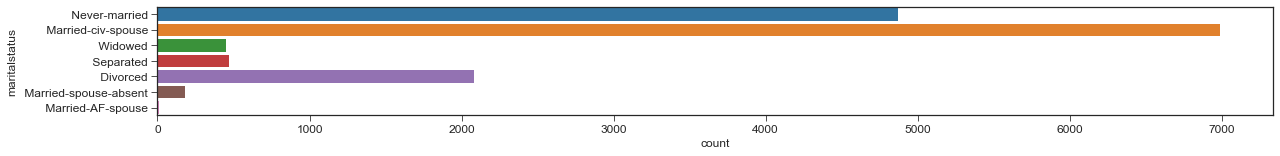

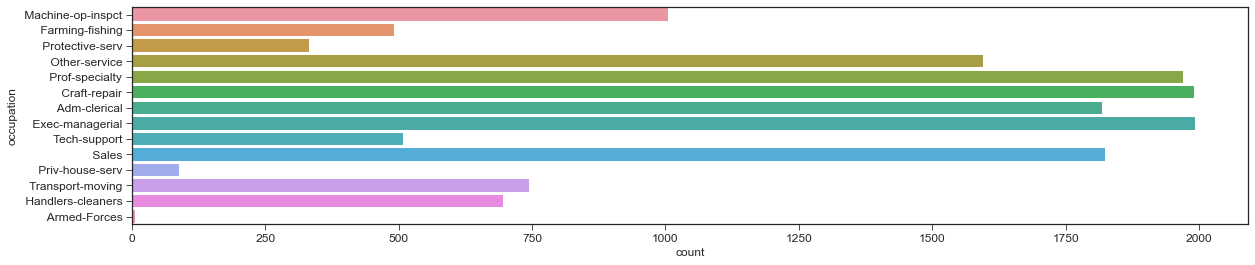

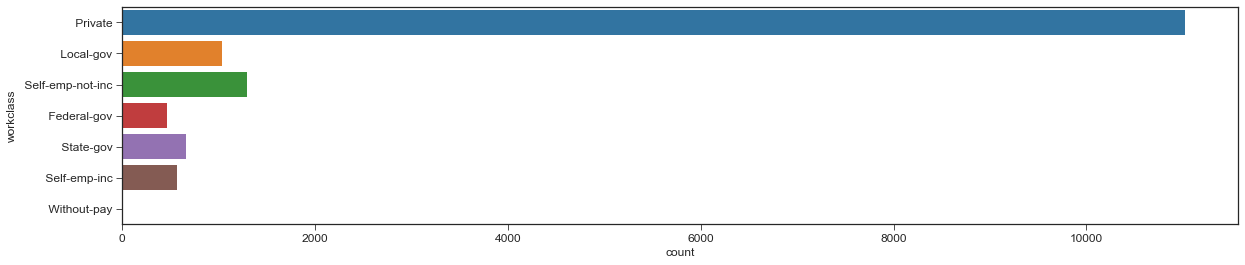

In [220]:
fig = plt.figure(figsize=(20,2))
plt.style.use('seaborn-ticks')
sns.countplot(y="maritalstatus", data=df)
plt.style.use('seaborn-ticks')
plt.figure(figsize=(20,4)) 
sns.countplot(y="occupation", data=df)
plt.style.use('seaborn-ticks')
plt.figure(figsize=(20,4)) 
sns.countplot(y="workclass", data=df)



C:\Users\pcs\anaconda3\lib\site-packages\seaborn\distributions.py:198: RuntimeWarning: Mean of empty slice.
  line, = ax.plot(a.mean(), 0)
C:\Users\pcs\anaconda3\lib\site-packages\numpy\core\_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\pcs\anaconda3\lib\site-packages\numpy\lib\histograms.py:908: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges


<AxesSubplot:xlabel='age', ylabel='age'>

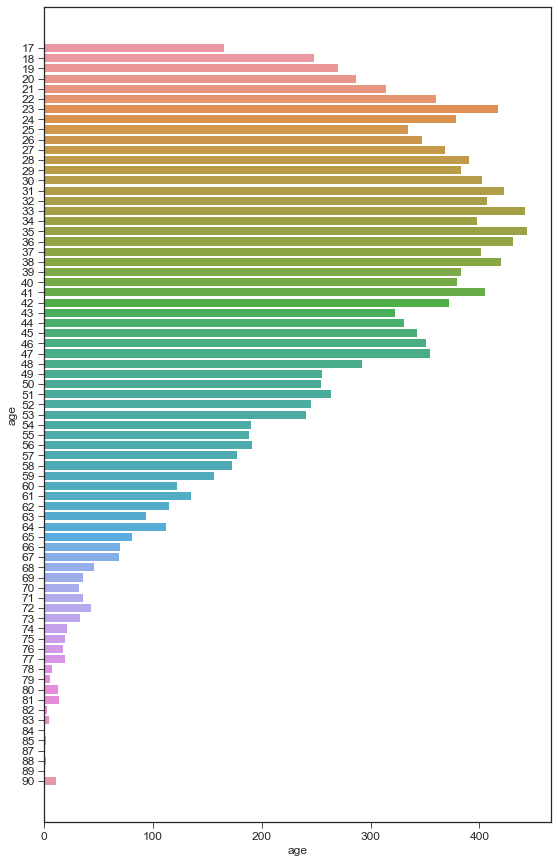

In [222]:
plt.style.use('seaborn-ticks')
fig = plt.figure(figsize=(20,15)) 
sns.distplot(df[df['Salary'] == '>50K']['age'], kde_kws={"label": ">$50K"})
plt.subplot(1, 2, 2)
sns.countplot(y="age",data=df)
sns.distplot(df[df['Salary'] == '<=50K']['age'], kde_kws={"label": "<=$50K"})


C:\Users\pcs\anaconda3\lib\site-packages\seaborn\axisgrid.py:2264: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


<AxesSubplot:xlabel='age', ylabel='hoursperweek'>

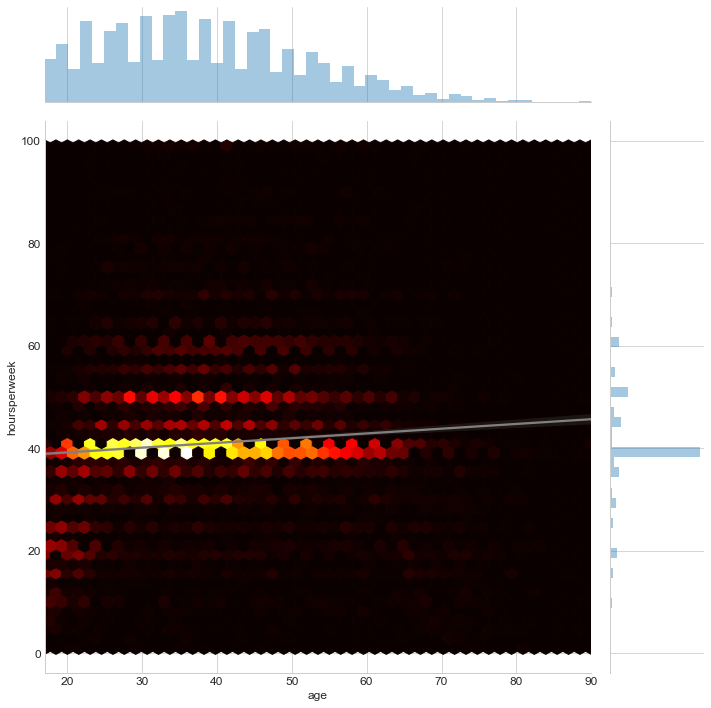

In [217]:
g = sns.jointplot(x = 'age', 
              y = 'hoursperweek',
              data = df, 
              kind = 'hex', 
              cmap= 'hot', 
              size=10)
sns.regplot(df.age, df['hoursperweek'], ax=g.ax_joint, scatter=False, color='grey')


C:\Users\pcs\anaconda3\lib\site-packages\seaborn\distributions.py:198: RuntimeWarning: Mean of empty slice.
  line, = ax.plot(a.mean(), 0)
C:\Users\pcs\anaconda3\lib\site-packages\numpy\core\_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\pcs\anaconda3\lib\site-packages\numpy\lib\histograms.py:908: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges


(20.0, 60.0)

<Figure size 1440x360 with 0 Axes>

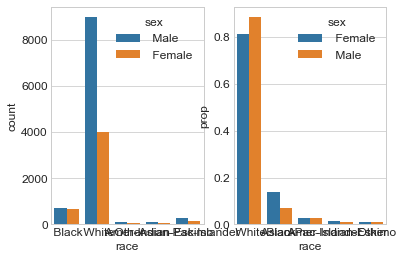

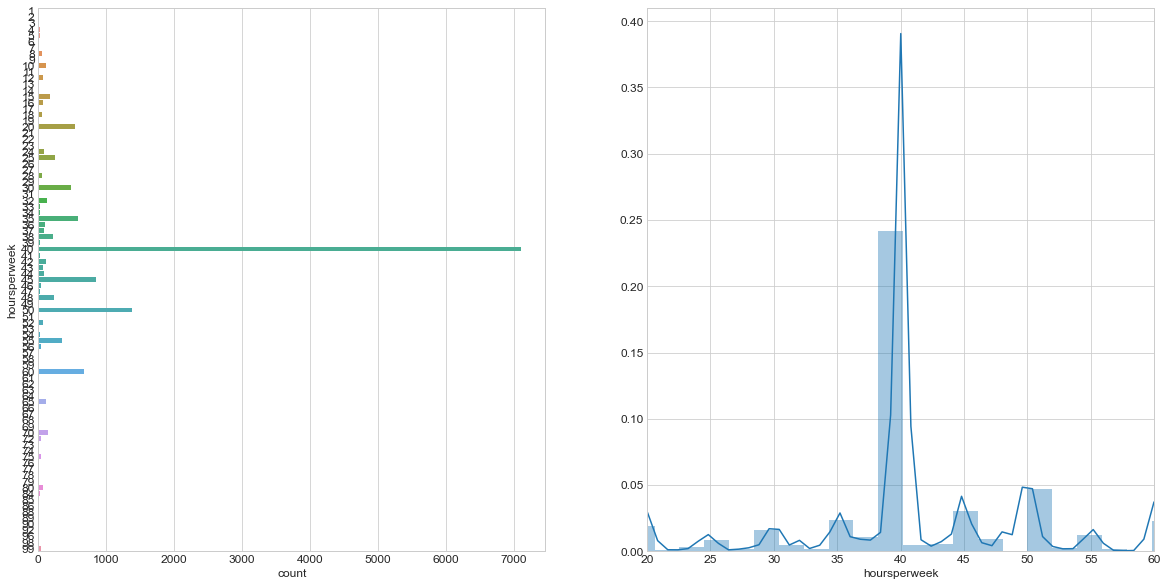

In [212]:
plt.style.use('seaborn-whitegrid')
x, y, hue = "race", "prop", "sex"
#hue_order = ["Male", "Female"]
plt.figure(figsize=(20,5)) 
f, axes = plt.subplots(1, 2)
sns.countplot(x=x,hue=hue, data=df,ax=axes[0])

prop_df = (df[x]
           .groupby(df[hue])
           .value_counts(normalize=True)
           .rename(y)
           .reset_index())

sns.barplot(x=x, y=y, hue=hue, data=prop_df, ax=axes[1])

plt.style.use('seaborn-whitegrid')
fig = plt.figure(figsize=(20,10)) 
plt.subplot(1, 2, 1)
sns.countplot(y="hoursperweek", data=df);
plt.subplot(1, 2, 2)
sns.distplot(df['hoursperweek']);
sns.distplot(df[df['Salary'] == '>50K']['hoursperweek'], kde_kws={"label": ">$50K"})
sns.distplot(df[df['Salary'] == '<=50K']['hoursperweek'], kde_kws={"label": "<$50K"})
plt.ylim(0, None)
plt.xlim(20, 60)



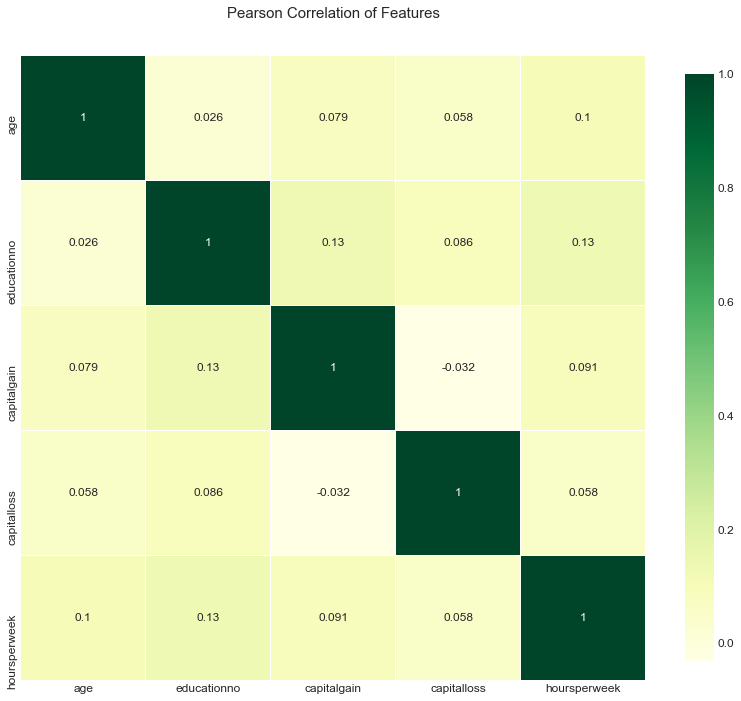

In [213]:
#correlation heatmap of dataset
def correlation_heatmap(df):
    _ , ax = plt.subplots(figsize =(14, 12))
    colormap = sns.diverging_palette(220, 10, as_cmap = True)
    
    _ = sns.heatmap(
        df.corr(), 
        cmap = "YlGn",
        square=True, 
        cbar_kws={'shrink':.9 }, 
        ax=ax,
        annot=True, 
        linewidths=0.1,vmax=1.0, linecolor='white',
        annot_kws={'fontsize':12 }
    )
    
    plt.title('Pearson Correlation of Features', y=1.05, size=15)
correlation_heatmap(df)

In [146]:
 #split X and y into training and testing sets

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [147]:
# check the shape of X_train and X_test

X_train.shape, X_test.shape

((10542, 13), (4518, 13))

In [148]:
# check data types in X_train

X_train.dtypes

age               int64
workclass        object
education        object
educationno       int64
maritalstatus    object
occupation       object
relationship     object
race             object
sex              object
capitalgain       int64
capitalloss       int64
hoursperweek      int64
native           object
dtype: object

In [149]:
# display categorical variables

categorical = [col for col in X_train.columns if X_train[col].dtypes == 'O']

categorical

['workclass',
 'education',
 'maritalstatus',
 'occupation',
 'relationship',
 'race',
 'sex',
 'native']

In [150]:
# print percentage of missing values in the categorical variables in training set

X_train[categorical].isnull().mean()

workclass        0.0
education        0.0
maritalstatus    0.0
occupation       0.0
relationship     0.0
race             0.0
sex              0.0
native           0.0
dtype: float64

In [151]:
# print categorical variables with missing data

for col in categorical:
    if X_train[col].isnull().mean()>0:
        print(col, (X_train[col].isnull().mean()))      

In [152]:
 print(col, (X_train[col].isnull().mean()))

native 0.0


In [153]:
# impute missing categorical variables with most frequent value

for df2 in [X_train, X_test]:
    df2['workclass'].fillna(X_train['workclass'].mode()[0], inplace=True)
    df2['occupation'].fillna(X_train['occupation'].mode()[0], inplace=True)
    df2['native'].fillna(X_train['native'].mode()[0], inplace=True)

C:\Users\pcs\anaconda3\lib\site-packages\pandas\core\generic.py:6245: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [154]:
# check missing values in categorical variables in X_train

X_train[categorical].isnull().sum()

workclass        0
education        0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
native           0
dtype: int64

In [155]:
# check missing values in categorical variables in X_test

X_test[categorical].isnull().sum()

workclass        0
education        0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
native           0
dtype: int64

In [156]:
# check missing values in X_train

X_train.isnull().sum()  #As a final check, I will check for missing values in X_train and X_test.

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
dtype: int64

In [157]:
# check missing values in X_test

X_test.isnull().sum()

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
dtype: int64

In [158]:
# print categorical variables

categorical

['workclass',
 'education',
 'maritalstatus',
 'occupation',
 'relationship',
 'race',
 'sex',
 'native']

In [159]:
X_train[categorical].head()

,workclass,education,maritalstatus,occupation,relationship,race,sex,native
4324,Private,HS-grad,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States
2179,Self-emp-not-inc,Prof-school,Married-civ-spouse,Prof-specialty,Husband,Asian-Pac-Islander,Male,India
1906,Private,HS-grad,Never-married,Adm-clerical,Not-in-family,Black,Female,United-States
5206,Private,HS-grad,Divorced,Sales,Not-in-family,White,Female,United-States
4659,Private,HS-grad,Never-married,Craft-repair,Own-child,White,Male,United-States


In [160]:
 #import category encoders
!pip install category_encoders

import category_encoders as ce

In [161]:
# encode remaining variables with one-hot encoding

encoder = ce.OneHotEncoder(cols=['workclass', 'education', 'maritalstatus', 'occupation', 'relationship', 
                                 'race', 'sex', 'native'])

X_train = encoder.fit_transform(X_train)

X_test = encoder.transform(X_test)

In [162]:
X_train.head()

,age,workclass_1,workclass_2,workclass_3,workclass_4,workclass_5,workclass_6,workclass_7,education_1,education_2,...,native_31,native_32,native_33,native_34,native_35,native_36,native_37,native_38,native_39,native_40
4324,41,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2179,53,0,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1906,65,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
5206,63,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4659,23,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [163]:
X_train.shape

(10542, 102)

In [164]:
X_test.head()

,age,workclass_1,workclass_2,workclass_3,workclass_4,workclass_5,workclass_6,workclass_7,education_1,education_2,...,native_31,native_32,native_33,native_34,native_35,native_36,native_37,native_38,native_39,native_40
4269,37,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7027,61,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8418,41,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
10064,23,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3305,29,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [165]:
# Feature Scaling 
#Table of Contents

cols = X_train.columns

In [166]:
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()

X_train = scaler.fit_transform(X_train)

X_test = scaler.transform(X_test)

In [167]:
X_train = pd.DataFrame(X_train, columns=[cols])
X_test = pd.DataFrame(X_test, columns=[cols])
X_train.head()

,age,workclass_1,workclass_2,workclass_3,workclass_4,workclass_5,workclass_6,workclass_7,education_1,education_2,...,native_31,native_32,native_33,native_34,native_35,native_36,native_37,native_38,native_39,native_40
0,0.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.8,-1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-0.7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [168]:
# train a Gaussian Naive Bayes classifier on the training set
from sklearn.naive_bayes import GaussianNB


# instantiate the model
gnb = GaussianNB()




In [169]:
# fit the model
gnb.fit(X_train, y_train)

GaussianNB()

In [170]:
y_pred = gnb.predict(X_test)

y_pred

array([' >50K', ' <=50K', ' <=50K', ..., ' <=50K', ' >50K', ' <=50K'],
      dtype='<U6')

In [171]:
from sklearn.metrics import accuracy_score

print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score: 0.8028


In [172]:
y_pred_train = gnb.predict(X_train)

y_pred_train

array([' >50K', ' >50K', ' <=50K', ..., ' <=50K', ' <=50K', ' <=50K'],
      dtype='<U6')

In [173]:
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train)))

Training-set accuracy score: 0.8017


In [174]:
#Check for overfitting and underfitting
# print the scores on training and test set

print('Training set score: {:.4f}'.format(gnb.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(gnb.score(X_test, y_test)))

Training set score: 0.8017
Test set score: 0.8028


In [175]:
# check class distribution in test set

y_test.value_counts()

 <=50K    3385
 >50K     1133
Name: Salary, dtype: int64

In [176]:
# check null accuracy score

null_accuracy = (7407/(7407+2362))

print('Null accuracy score: {0:0.4f}'. format(null_accuracy))

Null accuracy score: 0.7582


In [177]:
# Print the Confusion Matrix and slice it into four pieces

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

print('Confusion matrix\n\n', cm)

print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Positives(FP) = ', cm[0,1])

print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix

 [[2709  676]
 [ 215  918]]

True Positives(TP) =  2709

True Negatives(TN) =  918

False Positives(FP) =  676

False Negatives(FN) =  215


The confusion matrix shows 2709+918 = 3627 correct predictions and 676 + 215 = 1873 incorrect predictions.

In this case, we have

True Positives (Actual Positive:1 and Predict Positive:1) -2709

True Negatives (Actual Negative:0 and Predict Negative:0) - 918

False Positives (Actual Negative:0 but Predict Positive:1) - 676 (Type I error)

False Negatives (Actual Positive:1 but Predict Negative:0) - 215 (Type II error

<AxesSubplot:>

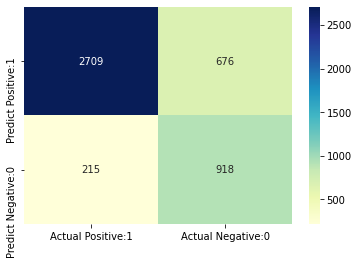

In [178]:
# visualize confusion matrix with seaborn heatmap

cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

In [179]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       <=50K       0.93      0.80      0.86      3385
        >50K       0.58      0.81      0.67      1133

    accuracy                           0.80      4518
   macro avg       0.75      0.81      0.77      4518
weighted avg       0.84      0.80      0.81      4518



In [180]:
#Classification accuracy
TP = cm[0,0]
TN = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]

In [181]:
# print classification accuracy

classification_accuracy = (TP + TN) / float(TP + TN + FP + FN)

print('Classification accuracy : {0:0.4f}'.format(classification_accuracy))

Classification accuracy : 0.8028


In [182]:
#Classification error
# print classification error

classification_error = (FP + FN) / float(TP + TN + FP + FN)

print('Classification error : {0:0.4f}'.format(classification_error))

Classification error : 0.1972


In [183]:
# print precision score

precision = TP / float(TP + FP)


print('Precision : {0:0.4f}'.format(precision))

Precision : 0.8003


In [184]:
recall = TP / float(TP + FN)

print('Recall or Sensitivity : {0:0.4f}'.format(recall))

Recall or Sensitivity : 0.9265


In [185]:
true_positive_rate = TP / float(TP + FN)


print('True Positive Rate : {0:0.4f}'.format(true_positive_rate))

True Positive Rate : 0.9265


In [186]:

false_positive_rate = FP / float(FP + TN)
print('False Positive Rate : {0:0.4f}'.format(false_positive_rate))


False Positive Rate : 0.4241


In [187]:
# print the first 10 predicted probabilities of two classes- 0 and 1

y_pred_prob = gnb.predict_proba(X_test)[0:10]

y_pred_prob

array([[3.48154770e-02, 9.65184523e-01],
       [9.99971965e-01, 2.80346728e-05],
       [9.58220760e-01, 4.17792398e-02],
       [9.99998598e-01, 1.40217160e-06],
       [7.44380787e-02, 9.25561921e-01],
       [9.99011204e-01, 9.88795606e-04],
       [9.99999974e-01, 2.63003814e-08],
       [9.99999999e-01, 9.51848857e-10],
       [2.69689128e-01, 7.30310872e-01],
       [8.01706993e-09, 9.99999992e-01]])

In [188]:
# store the probabilities in dataframe

y_pred_prob_df = pd.DataFrame(data=y_pred_prob, columns=['Prob of - <=50K', 'Prob of - >50K'])

y_pred_prob_df

,Prob of - <=50K,Prob of - >50K
0,3.481548e-02,9.651845e-01
1,9.999720e-01,2.803467e-05
2,9.582208e-01,4.177924e-02
3,9.999986e-01,1.402172e-06
4,7.443808e-02,9.255619e-01
5,9.990112e-01,9.887956e-04
6,1.000000e+00,2.630038e-08
7,1.000000e+00,9.518489e-10
8,2.696891e-01,7.303109e-01
9,8.017070e-09,1.000000e+00


In [189]:
# store the predicted probabilities for class 1 - Probability of >50K

y_pred1 = gnb.predict_proba(X_test)[:, 1]
y_pred1

array([9.65184523e-01, 2.80346728e-05, 4.17792398e-02, ...,
       5.82472551e-02, 9.99948170e-01, 6.40245003e-07])

Text(0, 0.5, 'Frequency')

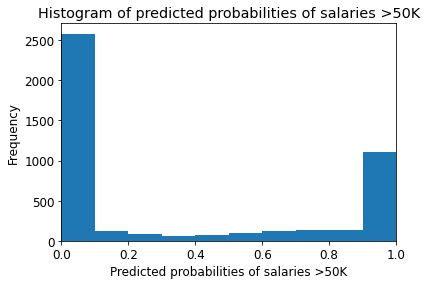

In [192]:
# plot histogram of predicted probabilities
import matplotlib.pyplot as plt

# adjust the font size 
plt.rcParams['font.size'] = 12
# plot histogram with 10 bins
plt.hist(y_pred1, bins = 10)
# set the title of predicted probabilities
plt.title('Histogram of predicted probabilities of salaries >50K')
# set the x-axis limit
plt.xlim(0,1)
# set the title
plt.xlabel('Predicted probabilities of salaries >50K')
plt.ylabel('Frequency')

# The ROC Curve plots the True Positive Rate (TPR) against the False Positive Rate (FPR) at various threshold levels.

C:\Users\pcs\anaconda3\lib\site-packages\sklearn\metrics\_ranking.py:811: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn("No positive samples in y_true, "


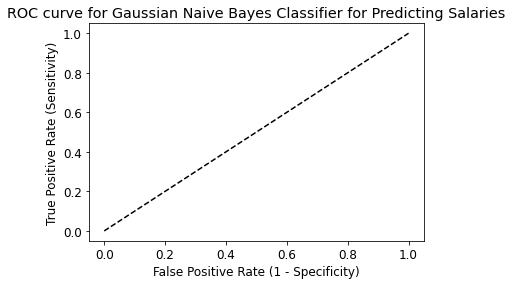

In [193]:
# plot ROC Curve

from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, y_pred1, pos_label = '<50K')

plt.figure(figsize=(6,4))

plt.plot(fpr, tpr, linewidth=2)

plt.plot([0,1], [0,1], 'k--' )

plt.rcParams['font.size'] = 12

plt.title('ROC curve for Gaussian Naive Bayes Classifier for Predicting Salaries')

plt.xlabel('False Positive Rate (1 - Specificity)')

plt.ylabel('True Positive Rate (Sensitivity)')

plt.show()

In [194]:

from sklearn.metrics import roc_auc_score

ROC_AUC = roc_auc_score(y_test, y_pred1)

print('ROC AUC : {:.4f}'.format(ROC_AUC))

ROC AUC : 0.8909


In [195]:
# Applying 10-Fold Cross Validation

from sklearn.model_selection import cross_val_score


scores = cross_val_score(gnb, X_train, y_train, cv = 10, scoring='accuracy')

print('Cross-validation scores:{}'.format(scores))

Cross-validation scores:[0.8        0.78957346 0.81593928 0.80265655 0.80645161 0.77419355
 0.81783681 0.78557875 0.81119545 0.80265655]


In [196]:
# compute Average cross-validation score

print('Average cross-validation score: {:.4f}'.format(scores.mean()))

Average cross-validation score: 0.8006


1)In this project, I build a Gaussian Naïve Bayes Classifier model to predict whether a person makes over 50K a year. 

The model yields a very good performance as indicated by the model accuracy which was found to be 0.8028.

2)The training-set accuracy score is 0.8017 while the test-set accuracy to be 0.8028. These two values are quite comparable. So, there is no sign of overfitting.

3)I have compared the model accuracy score which is 0.8028 with null accuracy score which is0.7582. So, we can conclude that our Gaussian Naïve Bayes classifier model is doing a very good job in predicting the class labels.

4)ROC AUC of our model approaches towards 1. So, we can conclude that our classifier does a very good job in predicting whether a person makes over 50K a year.

5)Using the mean cross-validation, we can conclude that we expect the model to be around 80.60% accurate on average.
If we look at all the 10 scores produced by the 10-fold cross-validation, we can also conclude that there is a relatively small variance in the accuracy between folds, ranging from 81.35% accuracy to 79.64% accuracy. So, we can conclude that the model is independent of the particular folds used for training.
Our original model accuracy is 0.8028, but the mean cross-validation accuracy is 0.8003. So, the 10-fold cross-validation accuracy does not result in performance improvement for this model.